
# Rainbowgrams

This notebook demonstrates how to use "Rainbowgrams" to simultaneously 
visualize amplitude and (unwrapped) phase (differential) as demonstrated in the
[NSynth paper](https://proceedings.mlr.press/v70/engel17a/engel17a.pdf) [1]_.

.. [1] Engel, Jesse, Cinjon Resnick, Adam Roberts, Sander Dieleman, Mohammad Norouzi, Douglas Eck, and Karen Simonyan.
    "Neural audio synthesis of musical notes with wavenet autoencoders."
    In International Conference on Machine Learning, pp. 1068-1077. PMLR, 2017.


In [1]:
# Code source: Brian McFee
# License: ISC

Standard imports



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

We implemented a stft method to visualize the rainbowgram and demonstrated the result with a chirp signal.
A chirp signal starts at a low frequency and gradually increases in frequency over time. We then separated the magnitude and phase components of the signal



In [3]:
sr = 22050
y = librosa.chirp(fmin=32, fmax=32 * 2**5, sr=sr, duration=10, linear=True)
D = librosa.stft(y)
mag, phase = librosa.magphase(D)

In [4]:
from IPython.display import Audio
Audio(data=y, rate=sr)

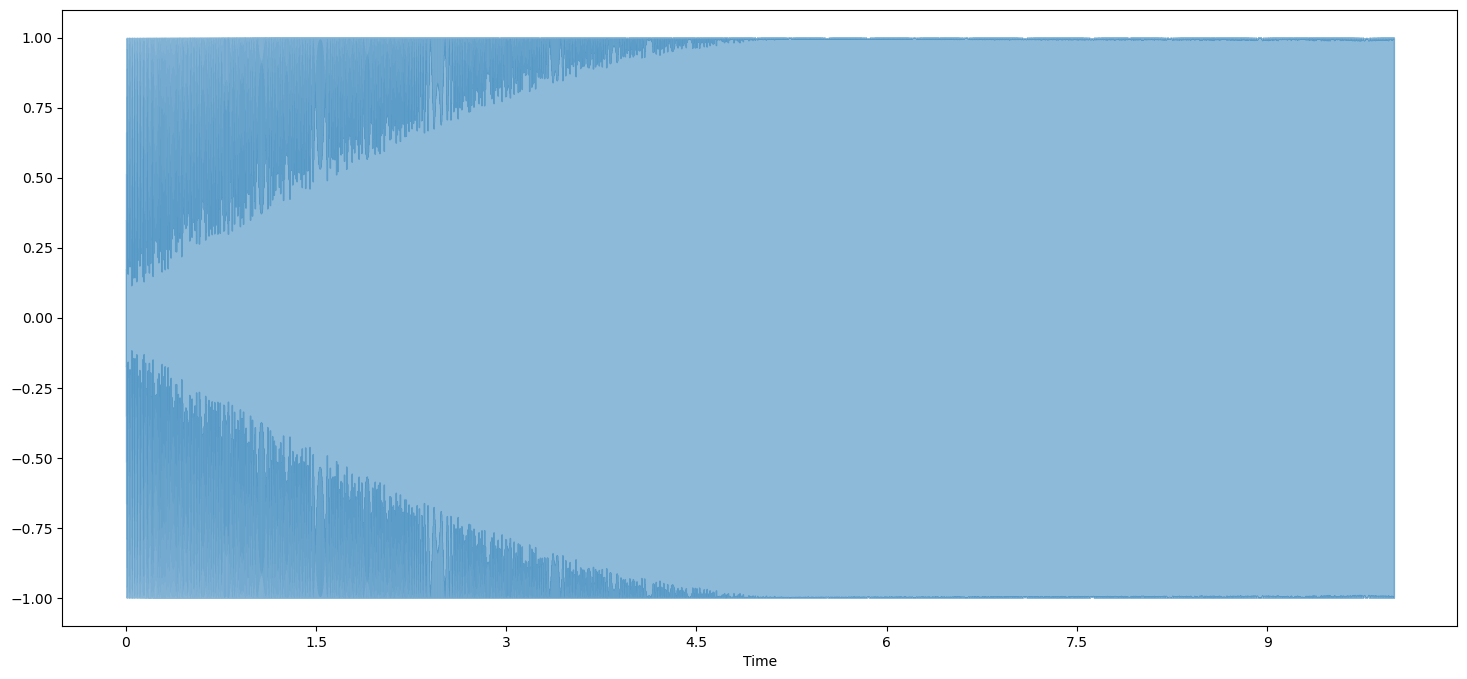

In [7]:
# plot waveform
plt.figure(figsize=(18, 8))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.show()

[Text(0.5, 1.0, 'Mel spectrogram')]

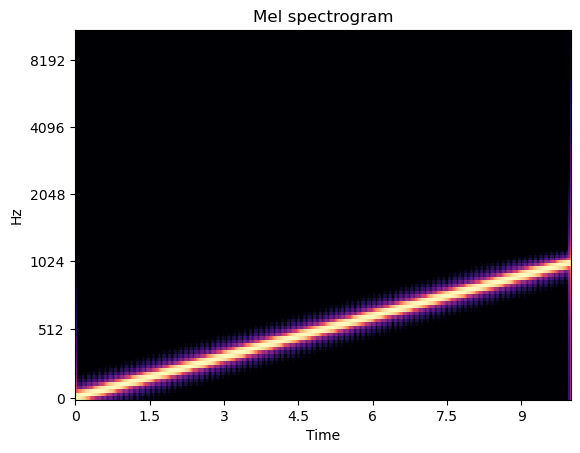

In [10]:
fig, ax = plt.subplots()
melspec = librosa.power_to_db(librosa.feature.melspectrogram(y=y, sr=sr), ref=np.max)
librosa.display.specshow(melspec, y_axis='mel', x_axis='time', ax=ax)
ax.set(title='Mel spectrogram')

We should be visualizing the demodulated phase differential derived by subtracting 2π*f*t 
from each phase estimate prior to unwrapping, where f and t are the frequency and time.



In [5]:
freqs = librosa.fft_frequencies()
times = librosa.times_like(D)

phase_exp = 2*np.pi*np.multiply.outer(freqs,times)

Plot the spectrum.



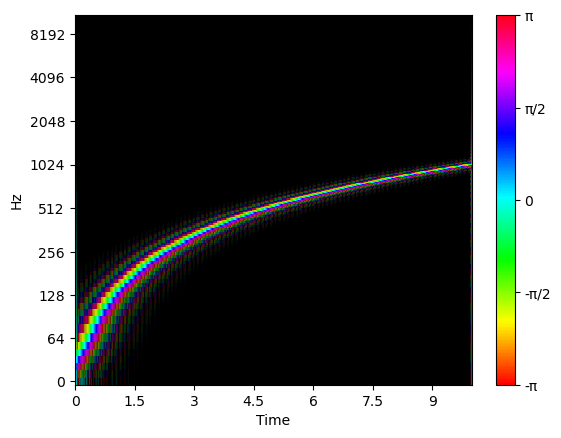

In [6]:
fig, ax = plt.subplots()
img = librosa.display.specshow(np.diff(np.unwrap(np.angle(phase)-phase_exp, axis=1), axis=1, prepend=0),
                         cmap='hsv', 
                         alpha=librosa.amplitude_to_db(mag, ref=np.max)/80 + 1,
                         ax=ax,
                         y_axis='log', 
                         x_axis='time')
ax.set_facecolor('#000')
cbar = fig.colorbar(img, ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
cbar.ax.set(yticklabels=['-π', '-π/2', "0", 'π/2', 'π']);
plt.show()

The above uses HSV colormap for phase fading to a black background. The twilight colormap 
can also work here, with the caveat that it uses black to code the extremes of the map (ie 0). 
We can sidestep this by using a neutral axis facecolor:



[[Text(1, -3.141592653589793, '-π'),
  Text(1, -1.5707963267948966, '-π/2'),
  Text(1, 0.0, '0'),
  Text(1, 1.5707963267948966, 'π/2'),
  Text(1, 3.141592653589793, 'π')]]

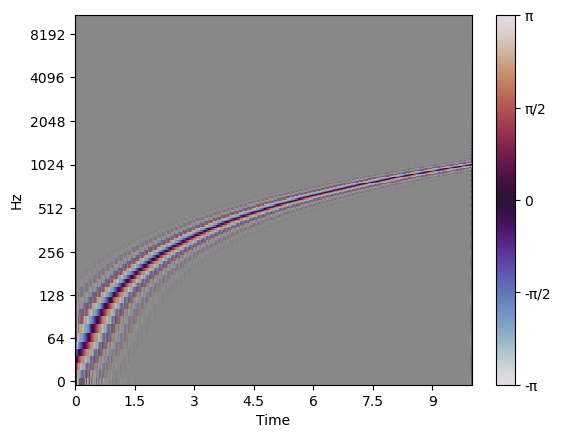

In [11]:
fig, ax = plt.subplots()
img = librosa.display.specshow(np.diff(np.unwrap(np.angle(phase)-phase_exp, axis=1), axis=1, prepend=0),
                         cmap='twilight', 
                         alpha=librosa.amplitude_to_db(mag, ref=np.max)/80 + 1,
                         ax=ax,
                         y_axis='log', 
                         x_axis='time')
ax.set_facecolor('#888')
cbar = fig.colorbar(img, ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
cbar.ax.set(yticklabels=['-π', '-π/2', 0, 'π/2', 'π'])